In [1]:
from importlib import reload
import tensorflow as tf

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
import utils_v2
reload(utils_v2)
from utils_v2 import *

import TaroDQNAgent
reload(TaroDQNAgent)
from TaroDQNAgent import TaroDQNAgent

In [6]:
import datetime

In [9]:
agent = TaroDQNAgent(cash_supply=5000, epsilon_decay=0.9)

In [5]:
# features
agent.external_states

['USDT_BTC_high',
 'USDT_BTC_low',
 'USDT_BTC_close',
 'USDT_BTC_open',
 'USDT_BTC_weighted_mean',
 'USDT_BTC_volatility',
 'USDT_BTC_pctChange',
 'USDT_BTC_open_label',
 'USDT_BTC_pctChange_label',
 'USDT_BTC_volatility_label']

In [8]:
import matplotlib.pyplot as plt

def plot_test(start_time, end_time):

    if end_time is None: # default: one day
        end_time = start_time + agent.env.time_delta * 24

    df = agent.env.df
    df = df.loc[df.index >= start_time]
    df = df.loc[df.index <= end_time]
    prices = df['USDT_BTC_open']

    actions = agent.test_actions
    actions = actions[actions.index >= start_time]
    actions = actions[actions.index < end_time]

    fig, ax1 = plt.subplots(figsize = (15, 8))

    ax1.plot(prices.index, prices, 'b-')
    ax1.set_ylabel('Price', color='b', fontsize=15)
    ax1.tick_params('y', colors='b', labelsize=15)

    hold = actions[actions == 1]
    buy = actions[actions == 2]
    sell = actions[actions == 0]

    ax2 = ax1.twinx()
    ax2.scatter(hold.index, hold, c='blue', label='HOLD')
    ax2.scatter(buy.index, buy, c='green', label='BUY')
    ax2.scatter(sell.index, sell, c='red', label='SELL')
    ax2.set_yticks([])
    ax2.legend(loc=1, fontsize=15)

    plt.xlim(actions.index[0], actions.index[-1])       

    plt.show()

# Train (2017-12-01 ~ 2018-01-01)

In [ ]:
train_start = datetime.datetime(2017,12,1,0)
train_end = datetime.datetime(2018,1,1,0)

sess = tf.Session()
agent.train(experiment_name='MakeMintConverge', session=sess, start_time = train_start, \
            end_time = train_end, num_episodes=300, verbose=False) # SHOULD USE MORE EPOCHS!!!

INFO:tensorflow:Restoring parameters from MakeMintConverge/model.ckpt
Start from saved checkpoint...
Training from  2017-12-01 00:00:00  to 2018-01-01 00:00:00 :  ~ 31 days

episode: 1/300, returns: -1.8e+01, epsilon: 1.0
episode: 2/300, returns: -1e+01, epsilon: 1.0
episode: 3/300, returns: -8.2, epsilon: 1.0
2226
episode: 4/300, returns: -9.8, epsilon: 0.9
2962
episode: 5/300, returns: -8.2, epsilon: 0.81
3698
episode: 6/300, returns: -3.2, epsilon: 0.73
4434
episode: 7/300, returns: -7.4, epsilon: 0.66
5170
episode: 8/300, returns: -1.7e+01, epsilon: 0.59
5906
episode: 9/300, returns: 1.4e+01, epsilon: 0.53
6642
episode: 10/300, returns: 5.6, epsilon: 0.48
7378
episode: 11/300, returns: -5.6, epsilon: 0.43
8114
episode: 12/300, returns: 8.4, epsilon: 0.39
8850
episode: 13/300, returns: -1.3e+01, epsilon: 0.35
9586
episode: 14/300, returns: -2.7e+01, epsilon: 0.31
10322
episode: 15/300, returns: -8.3, epsilon: 0.28
11058
episode: 16/300, returns: 2.8e+01, epsilon: 0.25
11794
episode:

# Sanity check

In [201]:
agent.env.set_current_time(datetime.datetime(2017,12,1,0))

In [24]:
agent.env.step()
state = agent.env.getStatesSequence() + agent.portfolio.getStates()
state -= agent.state_mean
print(state[:10])

agent.model.predict(sess, state)

[ 6.40815543e+03  6.43481955e+03  6.35675889e+03  6.51953110e+03
  6.36850448e+03  1.41401387e-04 -6.65119344e-03  1.49837823e+00
 -5.08287968e-01  9.10021735e-02]


array([[ -71.412224,  -65.35788 , -105.22204 ]], dtype=float32)

In [32]:
experiment_name = 'MakeMintConverge'
agent.saver.save(sess, "./"+experiment_name+"/model.ckpt")

'./MakeMintConverge/model.ckpt'

# Test on (2017-09-01 ~ 2018,1,1,0) Cheating...

In [17]:
test_start = datetime.datetime(2017,12,1,0)
test_end = datetime.datetime(2018,1,1,0)
agent.test(sess, start_time = test_start, end_time = test_end, verbose=True)

Testing from  2017-12-01 00:00:00  to 2018-01-01 00:00:00 :  ~ 31 days

Current time: 2017-12-01 00:00:00
Action start: Action.HOLD , Total value before action: 5000.0
Action end:  Action.HOLD , Total value now: 5000.000.  , Return since entry: 0.000 %

Current time: 2017-12-02 00:00:00
Action start: Action.HOLD , Total value before action: 5000.0
Action end:  Action.HOLD , Total value now: 5000.000.  , Return since entry: 0.000 %

Current time: 2017-12-03 00:00:00
Action start: Action.HOLD , Total value before action: 5000.0
Action end:  Action.HOLD , Total value now: 5000.000.  , Return since entry: 0.000 %

Current time: 2017-12-04 00:00:00
Action start: Action.HOLD , Total value before action: 5000.0
Action end:  Action.HOLD , Total value now: 5000.000.  , Return since entry: 0.000 %

Current time: 2017-12-05 00:00:00
Action start: Action.HOLD , Total value before action: 5000.0
Action end:  Action.HOLD , Total value now: 5000.000.  , Return since entry: 0.000 %

Current time: 2017

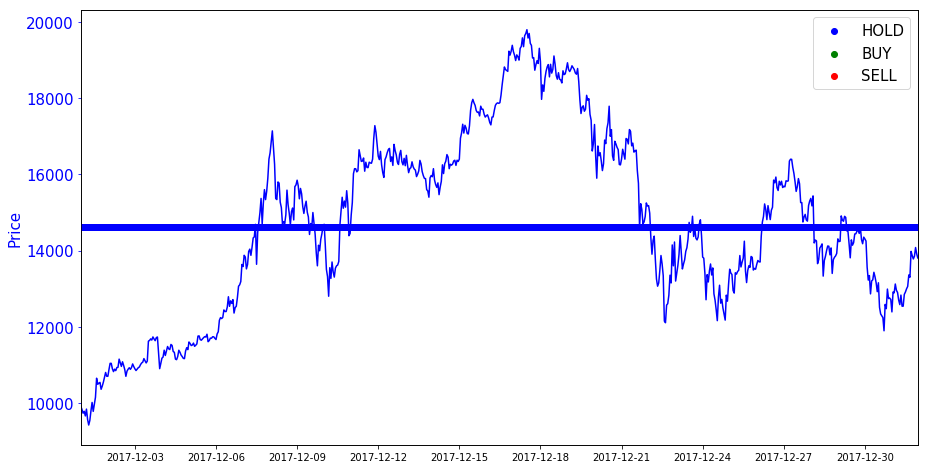

In [18]:
plot_test(test_start, test_end)

# Test on unseen time period (2018-01-01 ~ )

In [137]:
test_start = datetime.datetime(2018,1,1,0)
agent.test(sess, start_time = test_start, verbose=True)

Testing from  2018-01-01 00:00:00  to 2018-04-14 02:00:00 :  ~ 103 days

Current time: 2018-01-01 00:00:00
[[-246.31607 -247.9866  -249.27287]]
Action start: Action.SELL , Total value before action: 5000.0
Before selling: coin:0.000, cash:5000.000, sell price:13471.765
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:5000.000
Action end:  Action.HOLD , Total value now: 5000.000.  , Return since entry: 0.000 %

[[-247.55249 -250.3472  -249.5001 ]]
[[-246.27281 -247.69608 -248.5646 ]]
[[-241.3623  -245.43523 -243.55342]]
[[-240.4052  -244.7316  -241.98889]]
[[-236.87378 -241.77144 -238.77417]]
[[-238.09715 -240.65007 -240.26341]]
[[-237.99258 -238.16959 -241.01228]]
[[-239.15843 -237.07433 -242.15742]]
[[-238.34302 -236.20885 -241.90823]]
[[-236.74796 -235.46805 -240.30382]]
[[-236.6636  -235.54716 -240.10733]]
[[-232.49405 -237.06529 -234.41226]]
[[-229.96622 -234.25784 -232.0327 ]]
[[-228.98717 -234.36131 -230.55981]]
[[-226.63896 -231.23416 -228.36157]]

[[-319.09534 -313.1257  -320.86307]]
[[-308.20413 -304.13043 -311.2771 ]]
[[-295.9105  -293.86362 -299.32297]]
[[-285.34988 -295.7955  -286.56198]]
[[-284.6267 -293.8801 -284.9813]]
[[-299.00107 -292.42313 -301.9222 ]]
[[-301.50903 -290.7502  -305.26376]]
[[-297.92133 -282.02817 -304.02658]]
[[-291.62506 -284.8637  -296.93375]]
Current time: 2018-01-09 00:00:00
[[-284.07724 -286.24988 -287.3073 ]]
Action start: Action.SELL , Total value before action: 5000.0
Before selling: coin:0.000, cash:5000.000, sell price:15071.563
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:5000.000
Action end:  Action.HOLD , Total value now: 5000.000.  , Return since entry: 0.000 %

[[-287.02695 -287.88992 -291.16037]]
[[-288.41684 -292.86148 -291.25986]]
[[-293.53842 -293.92905 -296.96774]]
[[-300.59656 -295.25916 -305.0761 ]]
[[-302.95813 -297.2618  -306.92438]]
[[-303.8075  -297.56036 -308.32382]]
[[-298.25818 -297.0449  -302.5569 ]]
[[-297.356   -299.57785 -300.64096]]
[

[[-217.35435 -210.47765 -219.63023]]
[[-200.39223 -202.22798 -201.38509]]
[[-188.16948 -194.60814 -189.55954]]
[[-177.55907 -189.49297 -177.52551]]
[[-172.17772 -189.00513 -169.71646]]
[[-178.87878 -185.6574  -177.03899]]
[[-188.9759  -176.39836 -191.45999]]
[[-180.89766 -167.0594  -184.99686]]
[[-167.96367 -163.8137  -170.70543]]
[[-162.73447 -165.01396 -163.86826]]
[[-155.31181 -162.1381  -155.91026]]
[[-159.1038 -159.3137 -160.4815]]
[[-154.43971 -157.71512 -155.21251]]
[[-150.0137  -153.9861  -150.48807]]
[[-140.69884 -146.75305 -141.79535]]
Current time: 2018-01-17 00:00:00
[[-135.93034 -143.4719  -136.20924]]
Action start: Action.SELL , Total value before action: 4883.2274786880025
Before selling: coin:0.061, cash:4222.965, sell price:10776.220
After selling: coin sold:0.006, transaction fees:0.165, coin now:0.055, cash now:4288.826
Action end:  Action.SELL , Total value now: 4883.062.  , Return since entry: -2.339 %

[[-135.33467 -139.21638 -137.22227]]
[[-134.08472 -138.07478 -

[[-120.42792 -131.90211 -122.53334]]
Current time: 2018-01-24 00:00:00
[[-123.207726 -136.24083  -123.74133 ]]
Action start: Action.SELL , Total value before action: 5028.130425901355
Before selling: coin:0.008, cash:4940.238, sell price:10521.885
After selling: coin sold:0.001, transaction fees:0.022, coin now:0.008, cash now:4949.005
Action end:  Action.SELL , Total value now: 5028.108.  , Return since entry: 0.562 %

[[-126.960075 -136.69693  -127.49723 ]]
[[-128.74171 -133.87706 -130.20335]]
[[-124.90916 -130.71077 -126.83368]]
[[-121.91654 -128.6007  -123.34216]]
[[-117.95715  -127.84403  -118.879875]]
[[-118.83257 -125.33669 -120.39137]]
[[-119.06614 -122.86552 -121.94102]]
[[-116.38497 -122.06512 -118.80869]]
[[-117.694695 -123.76198  -120.23385 ]]
[[-118.11288 -124.63879 -120.67631]]
[[-121.6896  -125.42828 -124.50692]]
[[-121.47843 -127.3185  -124.75541]]
[[-122.803406 -128.37958  -126.155205]]
[[-122.081665 -131.79276  -124.79464 ]]
[[-129.06604 -136.9608  -130.92917]]
[[-133

[[ -90.70121 -101.47109  -92.08825]]
[[ -92.5671  -102.20267  -93.81271]]
[[ -94.449196 -100.48383   -96.4784  ]]
[[-89.74746 -99.04756 -91.55926]]
[[-86.36869  -98.495255 -87.47837 ]]
[[-87.09492  -98.928825 -88.22896 ]]
[[-88.789795 -98.85006  -89.80272 ]]
[[-91.50349  -96.774376 -93.69274 ]]
[[-91.100945 -96.28044  -93.56149 ]]
[[-89.42819 -95.25971 -92.08211]]
Current time: 2018-02-01 00:00:00
[[-86.95312 -95.80193 -89.27024]]
Action start: Action.SELL , Total value before action: 5057.554200889139
Before selling: coin:0.000, cash:5057.553, sell price:10174.316
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:5057.553
Action end:  Action.SELL , Total value now: 5057.554.  , Return since entry: 1.151 %

[[-88.5534  -97.58501 -90.49047]]
[[-90.11651  -98.55982  -92.319626]]
[[-91.52267 -99.08777 -93.64502]]
[[ -91.18859  -100.214966  -93.002785]]
[[-90.89385  -99.541245 -93.01285 ]]
[[-90.48981  -99.918686 -92.39517 ]]
[[ -89.490105 -101.346985  -90.73

[[193.11559  88.14595 144.9811 ]]
[[241.34885 117.09204 185.03607]]
[[229.62383   59.231842 194.74637 ]]
[[178.13383  25.03564 146.88385]]
[[133.34024   26.068043  91.493004]]
[[68.46652   -6.1474032 40.10972  ]]
[[45.91369   -7.7642055 14.666071 ]]
[[56.77129  -6.578502 21.922676]]
[[ -1.2765776 -19.091993   -4.4791675]]
[[ -8.234762 -23.148325 -10.816718]]
[[ -5.389857 -21.238918  -8.472306]]
[[-12.859237 -28.65511  -13.269473]]
[[ -6.364255 -23.488417  -8.445871]]
[[ -7.6421266 -22.435093   -9.818455 ]]
[[-10.234229  -24.599922  -11.5757885]]
[[-11.693256  -24.176228  -13.0826645]]
[[ -1.0556655 -13.799008   -5.560577 ]]
Current time: 2018-02-09 00:00:00
[[ -3.8862178 -16.923914   -6.7951407]]
Action start: Action.SELL , Total value before action: 5236.20413885778
Before selling: coin:0.005, cash:5200.575, sell price:7875.765
After selling: coin sold:0.000, transaction fees:0.009, coin now:0.004, cash now:5204.129
Action end:  Action.SELL , Total value now: 5236.195.  , Return since

[[-80.27847 -89.97347 -82.66805]]
Current time: 2018-02-16 00:00:00
[[-80.49499  -91.340515 -82.747795]]
Action start: Action.SELL , Total value before action: 5252.168315882083
Before selling: coin:0.000, cash:5252.163, sell price:10155.544
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:5252.164
Action end:  Action.SELL , Total value now: 5252.168.  , Return since entry: 5.043 %

[[-80.30404  -93.02465  -82.281075]]
[[-83.66618  -94.86493  -85.481606]]
[[-86.898735 -96.4591   -88.68723 ]]
[[-88.69155 -96.363   -90.6763 ]]
[[-88.317535 -95.07753  -90.919395]]
[[-85.34729  -95.08036  -87.300575]]
[[-84.35129  -96.083916 -85.61161 ]]
[[-83.39947 -95.56367 -84.60955]]
[[-83.90434 -94.43904 -85.22879]]
[[-83.11492 -93.14461 -84.30337]]
[[-81.66331 -91.74245 -82.91569]]
[[-80.04065  -89.389885 -81.71362 ]]
[[-77.529015 -87.84692  -78.96344 ]]
[[-78.21492  -87.600914 -80.09433 ]]
[[-78.51402 -86.31719 -81.13218]]
[[-76.74767  -87.042465 -78.86239 ]]
[[-79.80

[[-82.6358  -92.39782 -85.24175]]
[[-84.687065 -94.3984   -87.09094 ]]
[[-87.07622 -96.69152 -89.36471]]
[[-88.318886 -99.049706 -89.96215 ]]
[[-89.92614 -98.65045 -92.40161]]
[[-90.83224  -99.78745  -92.812485]]
[[ -88.2597   -100.32241   -89.458534]]
[[-87.178   -99.53991 -88.22918]]
[[-87.98582 -98.74505 -89.36024]]
[[-87.66712 -97.31168 -89.37295]]
Current time: 2018-02-24 00:00:00
[[-87.3994   -95.905785 -89.65026 ]]
Action start: Action.SELL , Total value before action: 5255.946006027819
Before selling: coin:0.003, cash:5224.089, sell price:10259.756
After selling: coin sold:0.000, transaction fees:0.008, coin now:0.003, cash now:5227.267
Action end:  Action.SELL , Total value now: 5255.938.  , Return since entry: 5.119 %

[[-86.48899 -96.2152  -88.70098]]
[[-87.38772  -96.970146 -89.50171 ]]
[[-92.17284  -97.57524  -95.158714]]
[[-91.44826 -98.58012 -94.33108]]
[[-92.37918 -99.68887 -95.36599]]
[[ -94.0084   -102.416725  -96.63756 ]]
[[ -95.34008 -104.76232  -97.12645]]
[[ -92.6

[[-134.0825  -140.93156 -136.79668]]
[[-135.30019 -141.85881 -138.1892 ]]
[[-136.2646  -143.63304 -138.97868]]
[[-135.66586 -144.92622 -138.0081 ]]
[[-136.85866 -145.95569 -139.03877]]
[[-138.37122 -147.06108 -140.51035]]
[[-139.21536 -147.34616 -141.36684]]
[[-139.61522 -146.76384 -142.21358]]
[[-140.16422 -147.57558 -142.56175]]
[[-141.16327 -148.11351 -143.73419]]
[[-141.52531 -148.05261 -144.2967 ]]
[[-142.15508 -149.12328 -144.71107]]
[[-142.52966 -149.90724 -145.06444]]
[[-143.08873 -150.1975  -145.79541]]
[[-144.0118  -151.35535 -146.41428]]
[[-144.2077  -152.29523 -146.12547]]
[[-144.29298 -151.12877 -146.70183]]
[[-143.0727  -150.64223 -145.50114]]
Current time: 2018-03-04 00:00:00
[[-141.62413 -150.49278 -143.68442]]
Action start: Action.SELL , Total value before action: 5255.092986316574
Before selling: coin:0.000, cash:5255.093, sell price:11282.752
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:5255.093
Action end:  Action.SELL , Total val

[[-44.747955 -57.861538 -45.12611 ]]
Current time: 2018-03-11 00:00:00
[[-43.157314 -54.957672 -43.365173]]
Action start: Action.SELL , Total value before action: 5202.2850468715405
Before selling: coin:0.002, cash:5187.015, sell price:8413.141
After selling: coin sold:0.000, transaction fees:0.004, coin now:0.002, cash now:5188.538
Action end:  Action.SELL , Total value now: 5202.281.  , Return since entry: 4.046 %

[[-40.869984 -51.476406 -41.441586]]
[[-37.456654 -46.662006 -38.819244]]
[[-33.81996 -44.42002 -34.82513]]
[[-30.256021 -41.977486 -31.33512 ]]
[[-29.694311 -40.248184 -31.243046]]
[[-27.875946 -39.3054   -29.356916]]
[[-27.767725 -38.920418 -29.049719]]
[[-29.01861  -38.712376 -31.090021]]
[[-28.88298  -38.19188  -30.921534]]
[[-27.368443 -39.41406  -28.770023]]
[[-27.826536 -39.55186  -29.885172]]
[[-21.934612 -34.640957 -25.918451]]
[[-25.007887 -40.381214 -27.300993]]
[[-32.34065  -45.71623  -34.087772]]
[[-38.63434  -47.293762 -41.171124]]
[[-41.480846 -49.601997 -43

[[503.72687 163.19653 494.0032 ]]
[[539.87823 204.1129  517.9507 ]]
[[577.1474  187.55579 571.4363 ]]
[[543.91254 184.75848 533.7652 ]]
[[464.10034 253.44772 405.174  ]]
[[472.13834 289.93253 394.90775]]
[[563.8865  250.9907  515.34106]]
Current time: 2018-03-19 00:00:00
[[469.89938 232.05135 408.25272]]
Action start: Action.SELL , Total value before action: 5184.744982462835
Before selling: coin:0.000, cash:5184.726, sell price:8233.364
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:5184.728
Action end:  Action.SELL , Total value now: 5184.745.  , Return since entry: 3.695 %

[[313.35376 181.47289 247.36864]]
[[244.36852 120.09076 191.97076]]
[[243.7489  111.13164 189.80276]]
[[234.42996   92.680046 181.70705 ]]
[[192.0642    12.114667 169.17146 ]]
[[84.085724  -5.4655013 59.518528 ]]
[[ 45.226524 -10.352926  25.39817 ]]
[[ 36.905834 -10.941949  16.101816]]
[[ 13.150113  -12.080594   -1.6770483]]
[[ 12.179262 -13.035753  -1.373967]]
[[48.009182 -8.845

[[-10.683394 -25.259016 -12.59689 ]]
[[-12.043682 -25.756346 -13.439692]]
[[-10.139842 -24.55625  -11.578025]]
[[ -5.90667   -21.251207   -7.6545496]]
[[ -2.893213  -18.69803    -4.9017653]]
[[ -0.35226   -17.25295    -2.1863792]]
[[ 12.14509    -13.578966    -0.12726222]]
[[ 22.98202  -10.504611   6.838112]]
[[32.348537 -8.958047 17.239016]]
[[92.816895   3.2402022 65.56171  ]]
[[110.05407   10.654808  83.66991 ]]
[[163.71469   18.081528 144.58156 ]]
[[176.81847   36.326378 149.61894 ]]
[[165.40282   54.159973 128.64655 ]]
Current time: 2018-03-27 00:00:00
[[171.44833   48.107143 138.37921 ]]
Action start: Action.SELL , Total value before action: 5184.744975472483
Before selling: coin:0.000, cash:5184.745, sell price:8140.017
After selling: coin sold:0.000, transaction fees:0.000, coin now:0.000, cash now:5184.745
Action end:  Action.SELL , Total value now: 5184.745.  , Return since entry: 3.695 %

[[154.43953   47.035587 117.58942 ]]
[[122.109566  31.993877  89.058304]]
[[121.93449  

[[670.72546 506.56204 675.26337]]
[[688.7574  490.06183 690.39294]]
[[662.1471  451.38464 664.62665]]
[[633.8946 410.8714 640.5456]]
[[568.04144 356.30493 575.51465]]
[[499.45355 328.30887 498.20926]]
[[506.81506 310.19632 504.96887]]
[[553.43286 295.02396 555.1287 ]]
[[497.99652 252.64148 502.39432]]
[[485.99365 225.3073  496.52283]]
[[447.71335 193.9069  461.5251 ]]
[[407.07123 185.05183 417.85748]]
[[428.71082 179.50795 444.55255]]
[[393.71973 180.45312 403.43564]]
[[378.96774 171.40689 387.7194 ]]
[[384.80237 167.43864 393.5587 ]]
[[368.75958 163.83667 372.62946]]
[[354.14944 132.85698 365.99786]]
[[308.0661  116.10092 317.52322]]
[[308.75244 120.98155 313.66318]]
[[321.91284  105.394905 335.58734 ]]
Current time: 2018-04-04 00:00:00
[[322.50262 100.72328 336.19473]]
Action start: Action.BUY , Total value before action: 5431.26849775814
Before buying: coin:0.707, cash:237.711, buy price:7450.325
After buying: coin bought:0.003, transaction fees:0.059, coin now:0.710, cash now:213.8

[[908.8742  731.8645  921.64545]]
[[904.6463  716.25323 921.38104]]
[[896.49994 706.50275 912.6709 ]]
[[894.52966 701.0756  909.58514]]
[[873.6059 679.6454 893.6258]]
Current time: 2018-04-11 00:00:00
[[882.85767 677.16284 902.9413 ]]
Action start: Action.BUY , Total value before action: 5038.185858124608
Before buying: coin:0.740, cash:0.000, buy price:6905.904
After buying: coin bought:0.000, transaction fees:0.000, coin now:0.740, cash now:0.000
Action end:  Action.BUY , Total value now: 5038.186.  , Return since entry: 0.764 %

[[867.9553  674.05414 888.0676 ]]
[[871.7899 672.6703 891.838 ]]
[[860.33   671.0896 881.4855]]
[[865.8789  674.72235 885.9994 ]]
[[872.8259  675.46625 894.1147 ]]
[[839.51605 678.9437  853.08014]]
[[870.58923 675.90155 889.67346]]
[[871.8022 675.8222 892.2113]]
[[864.42896 674.13776 881.1174 ]]
[[859.18616 670.8602  879.3818 ]]
[[860.3258  669.50214 878.9766 ]]
[[861.34503 668.67395 880.59393]]
[[856.01184 669.243   870.8571 ]]
[[848.5304 663.3172 861.1108]

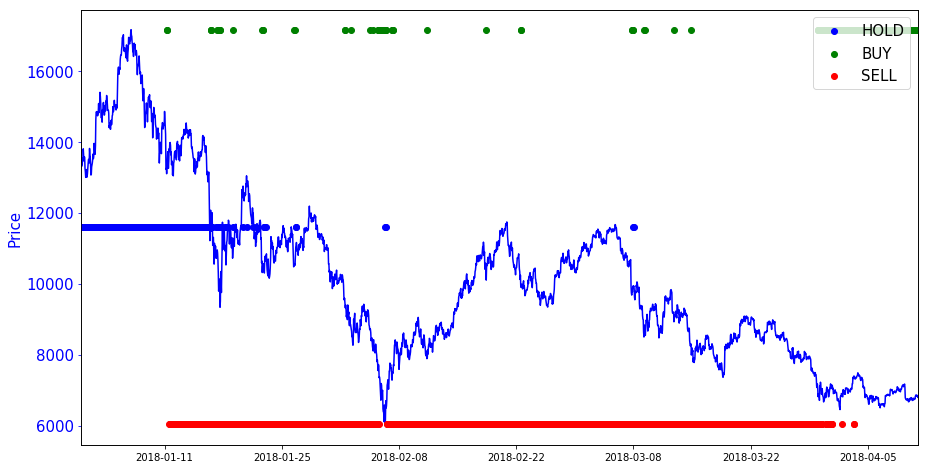

In [138]:
plot_test(test_start, datetime.datetime(2018,4,11,0))

# Save Model (Optional)

In [15]:
# to be implemented.... sorry....

# Always buy agent

In [204]:
from simple_agents import *

In [205]:
always_buy_agent = AlwaysBuyAgent(Action)

In [206]:
env = Environment()
now = datetime.datetime(2017,12,1,0)
test_end = datetime.datetime(2018,1,1,0)
env.set_current_time(now)
portfolio = Portfolio(cash_supply=1e8)
while True:
    action = always_buy_agent.get_action()
    if (env.current_index - env.start_index) / env.time_delta % 24 == 0:
        verbose = True
        print('Current time:', env.current_index)
    else:
        verbose = False
    current_price = env.getCurrentPrice()
    action = portfolio.apply_action(current_price, action, verbose=verbose)
    is_done, state = env.step()
    if env.current_index == test_end:
        break
print("Initial cash supply:", portfolio.starting_cash)
print("Final holdings:", portfolio.getCurrentHoldings(env.getCurrentPrice()))

Current time: 2017-12-01 13:00:00
Action start: Action.BUY , Total value before action: 101768167.32603675
Before buying: coin:7583.457, cash:25327021.511, buy price:10218.013
After buying: coin bought:247.866, transaction fees:6331.755, coin now:7831.323, cash now:22787987.604
Action end:  Action.BUY , Total value now: 101727623.464.  , Return since entry: 1.728 %

Current time: 2017-12-02 13:00:00
Action start: Action.BUY , Total value before action: 109454130.3945612
Before buying: coin:9763.814, cash:2006821.046, buy price:11155.333
After buying: coin bought:17.990, transaction fees:501.705, coin now:9781.804, cash now:1805637.237
Action end:  Action.BUY , Total value now: 109450917.846.  , Return since entry: 9.451 %

Current time: 2017-12-03 13:00:00
Action start: Action.BUY , Total value before action: 114972193.9853586
Before buying: coin:9931.208, cash:159013.199, buy price:11719.152
After buying: coin bought:1.357, transaction fees:39.753, coin now:9932.564, cash now:143072.1

Current time: 2017-12-30 13:00:00
Action start: Action.BUY , Total value before action: 123570645.59934495
Before buying: coin:9944.905, cash:0.000, buy price:12595.667
After buying: coin bought:0.000, transaction fees:0.000, coin now:9944.905, cash now:0.000
Action end:  Action.BUY , Total value now: 123570645.599.  , Return since entry: 23.571 %

Current time: 2017-12-31 13:00:00
Action start: Action.BUY , Total value before action: 128366983.95875396
Before buying: coin:9944.905, cash:0.000, buy price:13084.562
After buying: coin bought:0.000, transaction fees:0.000, coin now:9944.905, cash now:0.000
Action end:  Action.BUY , Total value now: 128366983.959.  , Return since entry: 28.367 %

Initial cash supply: 100000000.0
Final holdings: 9944.90 coins, 0.00 cash, 136306457.98 current value, 36.31 percent returns
